In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col

COVER_FILE = './forest_cover_dataset.csv'
forest_dataFile = pd.read_csv(COVER_FILE,names=cover_columns_names)
#Determine the number and types of features.
forest_dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280251 entries, 0 to 280250
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           280251 non-null  int64
 1   Aspect                              280251 non-null  int64
 2   Slope                               280251 non-null  int64
 3   Horizontal_Distance_To_Hydrology    280251 non-null  int64
 4   Vertical_Distance_To_Hydrology      280251 non-null  int64
 5   Horizontal_Distance_To_Roadways     280251 non-null  int64
 6   Hillshade_9am                       280251 non-null  int64
 7   Hillshade_Noon                      280251 non-null  int64
 8   Hillshade_3pm                       280251 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  280251 non-null  int64
 10  Wilderness_0                        280251 non-null  int64
 11  Wilderness_1                        280251 non-null 

In [2]:
forest_dataFile.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
0,2825,265,17,319,108,2298,174,245,209,342,...,0,0,1,0,0,0,0,0,0,0
1,2719,198,34,134,76,2352,187,245,167,693,...,0,0,0,0,0,0,0,0,0,0
2,3146,152,14,212,41,940,237,239,130,2007,...,0,0,0,0,0,0,0,0,0,0
3,2882,18,18,95,-3,485,203,199,128,342,...,1,0,0,0,0,0,0,0,0,0
4,2912,349,17,283,57,2729,187,210,160,2201,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Perform a ShuffleSplit of the data into training/validation/test sets, 60%/20%/20%.
from sklearn.model_selection import ShuffleSplit

def MySplit(n_splits,test_size,df):
  split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=23721266)
  for train_index, test_valid_index in split.split(df):
     set1 = df.iloc[train_index]
     set2 = df.iloc[test_valid_index]
     return set1,set2

train_set,test_valid_set = MySplit(1,0.4,forest_dataFile)
test_set,valid_set = MySplit(1,0.5,test_valid_set)

In [4]:
#Center the training/validation/test splits (fit on the training set, then transform the validation/test sets).
from sklearn.preprocessing import StandardScaler
center_function = lambda x: x - x.mean()
scaler = StandardScaler(with_std=False)


scaler.fit(train_set)

train_set_centered = scaler.transform(train_set)
test_set_centered = scaler.transform(test_set)
valid_set_centered = scaler.transform(valid_set)


train_set.head()
print(train_set_centered)

StandardScaler(with_std=False)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
273258,3013,177,10,361,56,4992,225,246,153,1559,...,0,0,0,0,0,0,0,0,0,0
165570,3163,41,16,30,10,1536,221,204,115,2462,...,0,0,0,0,0,0,0,0,0,0
146527,3214,144,14,270,27,2126,239,237,124,1708,...,0,0,0,0,0,0,0,0,0,0
79044,2321,352,26,42,12,1208,165,185,152,277,...,0,0,0,0,0,0,0,0,0,0
128539,2968,167,12,256,49,5419,230,244,145,2995,...,0,0,0,0,0,0,0,0,0,0


[[ 6.82547904e+01  2.10118822e+01 -4.13631876e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.18254790e+02 -1.14988118e+02  1.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.69254790e+02 -1.19881178e+01 -1.36318763e-01 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 ...
 [ 1.06254790e+02  1.88011882e+02  7.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 2.48254790e+02  1.86011882e+02 -1.11363188e+01 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]
 [ 4.41254790e+02  1.36011882e+02  8.86368124e+00 ... -1.65090693e-02
  -1.45346417e-02 -9.05144216e-03]]


In [5]:
#𝑘 -Means Clustering
'''
1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values 
for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. 
Construct models for each value of $k$ specified in the ``k_values`` array below.

'''
from sklearn.cluster import KMeans

    
k_values=list(range(2,11))+[15,20]
k_models =["k_means"+str(i) for i in k_values]

for i in range(len(k_models)):
    k_models[i] = KMeans(n_clusters=k_values[i], random_state=23721266).fit(train_set_centered) 



'\n1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values \nfor $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. \nConstruct models for each value of $k$ specified in the ``k_values`` array below.\n\n'

In [6]:
#2. Apply the trained models to the validation dataset.
k_valids =["k_valid"+str(i) for i in k_values]
for i in range(len(k_models)):
    k_valids[i] = k_models[i].predict(valid_set_centered)
    print(k_valids[i])
    

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]
[0 1 3 ... 0 0 1]
[3 1 0 ... 3 3 1]
[1 4 5 ... 1 1 4]
[4 5 6 ... 4 4 5]
[1 4 5 ... 1 1 4]
[5 2 8 ... 5 1 2]
[8 7 5 ... 8 3 7]
[ 0  4 10 ...  0 13  8]
[19 12  3 ... 19  2 18]


In [7]:
'''
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. 
For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models 
via their respective ```inertia_```. For the validation models, you can utilize 
the function ```total_inertia``` provided below.
'''
import matplotlib.pyplot as plt
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

Train_mean_inertias = []
Valid_mean_inertias = []

numOfSamples =  len(train_set_centered)

for i in range(len(k_models)):
    Train_mean_inertias.append(k_models[i].inertia_/numOfSamples)
print(Train_mean_inertias)


for i in range(len(k_models)):
    Valid_mean_inertias.append(total_inertia(valid_set_centered,k_models[i].cluster_centers_,k_valids[i],distance=None,mean=True))
print(Valid_mean_inertias)


'\n3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. \nFor the training data, you can extract the *total* (**unnormalized**) inertia from the trained models \nvia their respective ```inertia_```. For the validation models, you can utilize \nthe function ```total_inertia``` provided below.\n'

[2341012.563974211, 1644887.354320643, 1269061.8651333533, 1008725.2982929216, 885990.8858518186, 767906.4084918541, 692909.6274348755, 631824.9834376482, 578473.6472634225, 419943.9588923205, 342480.8245872137]
[2347441.5255471007, 1644260.983982393, 1275261.539979473, 1010992.376421578, 883945.6332019499, 767808.392191865, 690046.7293108647, 631478.3531613607, 577058.0167088569, 421606.8595340662, 344821.4319810845]


'\nPlot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. \n'

Text(0.5, 1.0, 'mean inertias')

Text(0, 0.5, 'mean inertias')

Text(0.5, 0, 'K values')

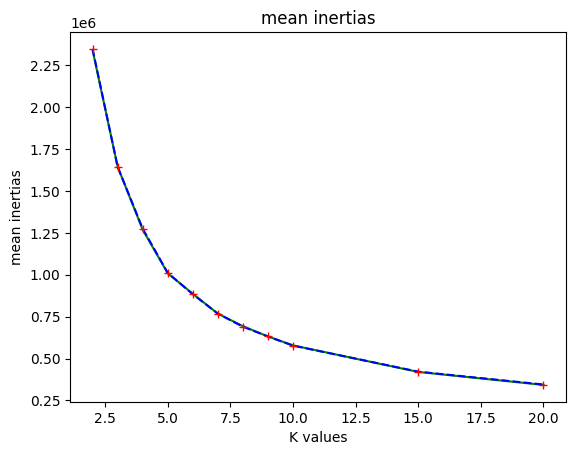

In [8]:
'''
Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. 
'''
plt.plot(k_values,Train_mean_inertias,'g')
plt.plot(k_values,Valid_mean_inertias,'b--')
plt.plot(k_values,Valid_mean_inertias,'r+')
plt.title('mean inertias')
plt.ylabel('mean inertias')
plt.xlabel('K values')



In [9]:
from sklearn.metrics import silhouette_score
'''
The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with 
inter-cluster distances from clusters in close proximity to each other. 
'''
silhouette_scores = []
for v in k_valids: 
    silhouette_scores.append(silhouette_score(valid_set_centered,v,random_state=23721266)) 

'\nThe *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with \ninter-cluster distances from clusters in close proximity to each other. \n'

[0.46027381764253095, 0.44054393089208294, 0.33925833436572206, 0.3526244674635626, 0.34095363605198437, 0.33766819537143444, 0.3318529033475337, 0.2957271016054832, 0.29451272199627376, 0.2670074895830763, 0.2556219835464802]


Text(0.5, 1.0, 'silhouette_scores')

Text(0, 0.5, 'silhouette_scores')

Text(0.5, 0, 'K values')

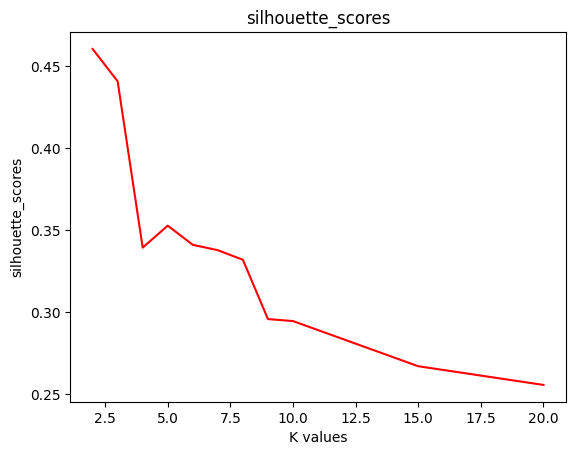

In [10]:
print(silhouette_scores)
plt.plot(k_values,silhouette_scores,'r')
plt.title('silhouette_scores')
plt.ylabel('silhouette_scores')
plt.xlabel('K values')

In [11]:
'''
Using whichever value of $k$ you think is the best based on steps 4) and 5), 
create a plot for each feature that contains 
[boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) 
of that feature for each cluster. Based upon these plots, 
determine which features you think are meaningful in discriminating between the clusters, 
as well as any other trends you observe.
'''

'\nUsing whichever value of $k$ you think is the best based on steps 4) and 5), \ncreate a plot for each feature that contains \n[boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) \nof that feature for each cluster. Based upon these plots, \ndetermine which features you think are meaningful in discriminating between the clusters, \nas well as any other trends you observe.\n'

In [12]:
#Part 2 2.1 Load Data
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

CRIME_FILE = './crime.csv'
CRIME_dataFrame = pd.read_csv(CRIME_FILE,names=crime_column_names)
CRIME_dataFrame.head()

#number of features & type of features
CRIME_dataFrame.info()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [13]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
#Perform a ShuffleSplit of the data into training/validation/test sets, 60%/20%/20%.
#preprocess string features     

def labelizedString(df2):
    le = preprocessing.LabelEncoder()
    for column_name in df2.columns:
        if df2[column_name].dtype == object:
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
        
CRIME_dataFrame.replace('?',np.nan,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
labelizedString(CRIME_dataFrame)
imp_mean.fit_transform(CRIME_dataFrame)

CRIME_train_set,CRIME_test_valid_set = MySplit(1,0.4,CRIME_dataFrame)
CRIME_test_set,CRIME_valid_set = MySplit(1,0.5,CRIME_test_valid_set)

array([[8.00e+00, 1.08e+02, 7.99e+02, ..., 3.20e-01, 1.40e+01, 2.00e-01],
       [5.30e+01, 1.08e+02, 7.99e+02, ..., 0.00e+00, 5.10e+01, 6.70e-01],
       [2.40e+01, 1.08e+02, 7.99e+02, ..., 0.00e+00, 5.10e+01, 4.30e-01],
       ...,
       [9.00e+00, 1.02e+02, 7.09e+02, ..., 9.10e-01, 2.80e+01, 2.30e-01],
       [2.50e+01, 3.40e+01, 6.21e+02, ..., 2.20e-01, 1.80e+01, 1.90e-01],
       [6.00e+00, 1.08e+02, 7.99e+02, ..., 1.00e+00, 1.30e+01, 4.80e-01]])

In [14]:
#Split the non-test data (training + validation data) into 5 folds for cross-validation purposes.
#Perform any necessary preprocessing on dataset
from sklearn.model_selection import KFold

CRIME_mergeDataSet = pd.concat([CRIME_train_set,CRIME_valid_set])
X_CRIME_mergeDataSet = CRIME_mergeDataSet.drop('ViolentCrimesPerPop',axis=1)
Y_CRIME_mergeDataSet = CRIME_mergeDataSet['ViolentCrimesPerPop']

kf = KFold(n_splits=5,random_state=23721266,shuffle=True)


In [15]:
from sklearn.linear_model import LinearRegression
#2.2 Linear Regression
#Construct a linear model using Scikit-learn's LinearRegression method with default parameters.

#separate features and labels
Linear_X_train = CRIME_train_set.drop('ViolentCrimesPerPop',axis=1)
Linear_Y_train = CRIME_train_set['ViolentCrimesPerPop']
reg＿model = LinearRegression()


In [16]:
'''
Report the following performance metrics on the training and validation sets:
Mean Squared Error, Mean Absolute Error, and the Coefficient of Determination ( 𝑟2 ).
'''
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_validate
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
     if k != 'estimator':
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

X_CRIME_valid_set = CRIME_valid_set.drop('ViolentCrimesPerPop',axis=1)
Y_CRIME_valid_set = CRIME_valid_set['ViolentCrimesPerPop']
reg_model.fit(Linear_X_train,Linear_Y_train)
reg_score = p2_metrics_scorer(reg_model,X_CRIME_valid_set,Y_CRIME_valid_set)
reg_score



'\nReport the following performance metrics on the training and validation sets:\nMean Squared Error, Mean Absolute Error, and the Coefficient of Determination ( 𝑟2 ).\n'

LinearRegression()

{'mse': -0.01910487936571296,
 'mae': -0.10025799082674744,
 'r2': -0.6440997107339868}

In [30]:
#Report the weights (coefficients) of the linear model and their associated features in ascending order.
pd.set_option('display.max_rows', None)
coedf = pd.DataFrame(reg_model.coef_, X_CRIME_valid_set.columns, columns=['Coefficients'])
coedf.sort_values(by=['Coefficients'],ascending=True)
pd.set_option('display.max_rows', 15)

,Coefficients
whitePerCap,-0.812929
PctPersOwnOccup,-0.702511
OwnOccLowQuart,-0.564148
population,-0.462064
PctRecImmig10,-0.449782
NumIlleg,-0.435485
PctKids2Par,-0.409582
PctLargHouseFam,-0.397716
RentLowQ,-0.282177
PctPopUnderPov,-0.259811


In [18]:
#2.3 Linear Regression and PCA
'''
Perform principal component analysis on the training data. You may use Scikit-learn's PCA function for this, 
which automatically centers the data prior to PCA. Using PCA, choose the number of components for 
which the total explained variance is ≥99%, and report this.
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

PCA_CRIME_train_set = CRIME_train_set.copy()
MMscaler = MinMaxScaler()
PCA_CRIME_train_set_rescaled = MMscaler.fit_transform(PCA_CRIME_train_set)

pca = PCA(n_components = 0.99)
pca.fit(PCA_CRIME_train_set_rescaled)
reduced = pca.transform(PCA_CRIME_train_set_rescaled)
print(pca.n_components_)

"\nPerform principal component analysis on the training data. You may use Scikit-learn's PCA function for this, \nwhich automatically centers the data prior to PCA. Using PCA, choose the number of components for \nwhich the total explained variance is ≥99%, and report this.\n"

PCA(n_components=0.99)

69


(0.0, 1.1)

Text(0.5, 0, 'Number of Components')

([<matplotlib.axis.XTick at 0x29f50d8d5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

Text(0, 0.5, 'Cumulative variance (%)')

Text(0.5, 1.0, 'The number of components needed to explain variance')

Text(0.5, 0.85, '99% cut-off threshold')

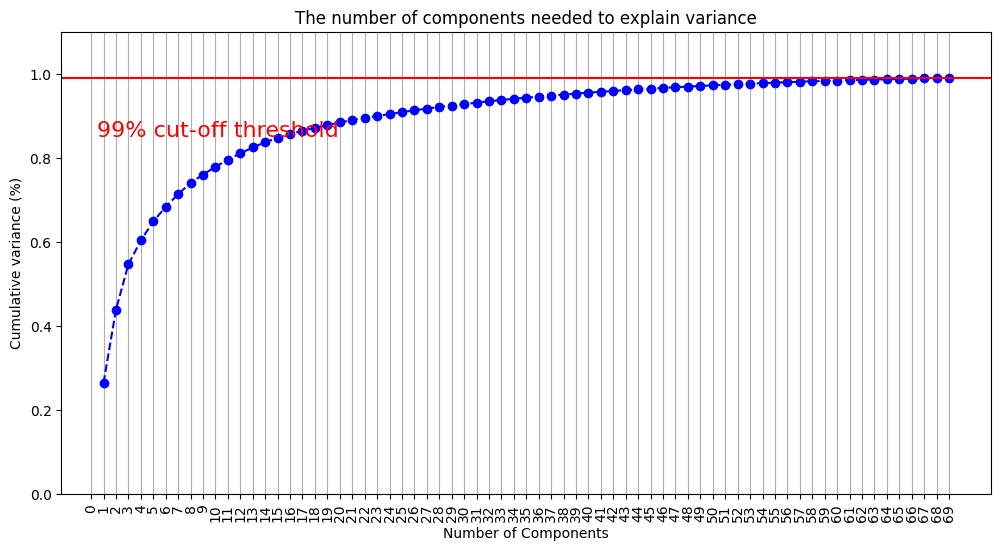

In [19]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 70, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 70, step=1),rotation = 90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [20]:
#After determining the correct number of components, apply the PCA transformation to the validation and test sets.
pca_CRIME_merge_set = pd.concat([CRIME_train_set,CRIME_valid_set]) 
X_CRIME_mergeDataSet = pca_CRIME_merge_set.drop('ViolentCrimesPerPop',axis=1)
Y_CRIME_mergeDataSet = pca_CRIME_merge_set['ViolentCrimesPerPop']

pca_2 = PCA(n_components=69)
pca_2.fit(X_CRIME_mergeDataSet)
pca_transformed_CRIME_set = pca_2.transform(X_CRIME_mergeDataSet)


PCA(n_components=69)

In [21]:
'''
Create another model via LinearRegression but using the data transformed by PCA Construct a linear model 
using Scikit-learn's LinearRegression method with default parameters.
'''

reg2＿model = LinearRegression()
reg2＿model.fit(pca_transformed_CRIME_set,Y_CRIME_mergeDataSet)


"\nCreate another model via LinearRegression but using the data transformed by PCA Construct a linear model \nusing Scikit-learn's LinearRegression method with default parameters.\n"

LinearRegression()

In [22]:
#Report the same performance metrics as in 2.2 on the validation set. 
#How does the model's performance compare to that of the model in 2.2?

X_CRIME_valid_set = CRIME_valid_set.drop('ViolentCrimesPerPop',axis=1)
Y_CRIME_valid_set = CRIME_valid_set['ViolentCrimesPerPop']

PCA_cv_results = cross_validate(reg2＿model, X_CRIME_valid_set,Y_CRIME_valid_set, cv=kf, scoring=p2_metrics_scorer)
PCA_cv_stats = collate_cv_results(PCA_cv_results)



fit_time 0.02919902801513672 (0.0015830197486620113)
score_time 0.003211355209350586 (0.00039101090661299525)
test_mse -0.03459363983930896 (0.0060174209243343685)
test_mae -0.1331582463088359 (0.00921216680314499)
test_r2 -0.3310034644075845 (0.17010211512861925)


In [23]:
#2.4 LASSO
#Using GridSearchCV, determine the best choice of the hyperparameter  𝛼  out of values in the list alphas below.
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import time

alphas = 10**np.linspace(1,-3,50)*0.5

parameters = {'alpha':alphas,'max_iter':[4000]}

#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

My_LASSO = Lasso()
clf = GridSearchCV(My_LASSO,parameters,scoring=p2_metrics_scorer,refit='mse',cv=kf,n_jobs=-1,return_train_score=False)
time_start = time.time()
clf.fit(X_CRIME_mergeDataSet,Y_CRIME_mergeDataSet) 
time_end = time.time()
time_c = time_end-time_start
print(clf.best_params_)

GridSearchCV(cv=KFold(n_splits=5, random_state=23721266, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([5.00000000e+00, 4.14321386e+00, 3.43324423e+00, 2.84493301e+00,
       2.35743318e+00, 1.95346997e+00, 1.61872877e+00, 1.34134790e+00,
       1.11149824e+00, 9.21034985e-01, 7.63208984e-01, 6.32427608e-01,
       5.24056567e-01, 4.34255687e-01, 3.59842837e-01, 2...
       1.22102655e-02, 1.01179482e-02, 8.38416468e-03, 6.94747747e-03,
       5.75697700e-03, 4.77047738e-03, 3.95302161e-03, 3.27564278e-03,
       2.71433772e-03, 2.24921633e-03, 1.86379686e-03, 1.54442180e-03,
       1.27977396e-03, 1.06047544e-03, 8.78755312e-04, 7.28174239e-04,
       6.03396320e-04, 5.00000000e-04]),
                         'max_iter': [4000]},
             refit='mse',
             scoring=<function p2_metrics_scorer at 0x0000029F4D4124C0>)

{'alpha': 0.0006033963203196644, 'max_iter': 4000}


In [24]:
#Report the time required to perform cross-validation via GridSearchCV. 
#Report the mean and standard deviation of the performance metrics 
#for the best performing model along with its associated hyperparameter. 
#You may use the function collate_ht_results for this purpose.'''
print(time_c)
collate_ht_results(clf,display=True)

9.5566725730896
test_mse -0.019526945649237838 (0.001393538290908324)
test_mae -0.0966575162252554 (0.003313127951329735)
test_r2 -0.636776693369576 (0.029946625715175278)


{'mse_mean': -0.019526945649237838,
 'mse_std': 0.001393538290908324,
 'mae_mean': -0.0966575162252554,
 'mae_std': 0.003313127951329735,
 'r2_mean': -0.636776693369576,
 'r2_std': 0.029946625715175278}

In [25]:
#Report the weights (coefficients) of the LASSO model and their associated features in ascending order. 
#Note that LASSO attempts to set as many weights to zero in order to create a more parsimonious model 
#while still maintaining regression performance. How many weights are non-zero?



In [26]:
#2.5 Multilayer Perceptron (MLP)
#Using GridSearchCV, determine the best choice of hyperparameters out of the following possible values:
from sklearn.neural_network import MLPRegressor


MLparam = {'hidden_layer_sizes':[(10),(20,20),(50,50,50)],
           'learning_rate_init':[1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}

My_ML = MLPRegressor(max_iter=10000,early_stopping=True)
MLclf = GridSearchCV(My_ML,MLparam,scoring=p2_metrics_scorer,refit='mse',cv=kf,n_jobs=-1,return_train_score=False)
time_start = time.time()
MLclf.fit(X_CRIME_mergeDataSet.values,Y_CRIME_mergeDataSet.values) 
time_end = time.time()



GridSearchCV(cv=KFold(n_splits=5, random_state=23721266, shuffle=True),
             estimator=MLPRegressor(early_stopping=True, max_iter=10000),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [10, (20, 20), (50, 50, 50)],
                         'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                0.5, 1, 5, 10, 50, 100]},
             refit='mse',
             scoring=<function p2_metrics_scorer at 0x0000029F4D4124C0>)

In [27]:
time_c = time_end-time_start
print(time_c)
print(MLclf.best_params_)

collate_ht_results(MLclf,display=True)

110.20568799972534
{'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.01}
test_mse -0.037147253571959624 (0.008450133470586436)
test_mae -0.13576526979355436 (0.014797035571118321)
test_r2 -0.31383449228341265 (0.14235869730064088)


{'mse_mean': -0.037147253571959624,
 'mse_std': 0.008450133470586436,
 'mae_mean': -0.13576526979355436,
 'mae_std': 0.014797035571118321,
 'r2_mean': -0.31383449228341265,
 'r2_std': 0.14235869730064088}

In [28]:
#2.6 Final Models
#Using the full training set (training + validation), train two linear regression models, one with and without 
#PCA preprocessing, then apply them to the test set. For LASSO and MLP, you can utilize the best models found 
#during cross-validation and just apply them to the test set.

Final_CRIME_mergeDataSet = pd.concat([CRIME_train_set,CRIME_valid_set])
Final_X_CRIME_mergeDataSet = CRIME_mergeDataSet.drop('ViolentCrimesPerPop',axis=1)
Final_Y_CRIME_mergeDataSet = CRIME_mergeDataSet['ViolentCrimesPerPop']

Final_X_CRIME_test_set = CRIME_test_set.drop('ViolentCrimesPerPop',axis=1)
Final_Y_CRIME_test_set = CRIME_test_set['ViolentCrimesPerPop']

Final_reg = LinearRegression()
Final_PCA_reg = LinearRegression()

pca_final = PCA(n_components=69)
pca_final.fit(Final_X_CRIME_mergeDataSet)
pca_final_X_CRIME_set = pca_2.transform(Final_X_CRIME_mergeDataSet)

#Final_reg
Final_reg.fit(Final_X_CRIME_mergeDataSet,Final_Y_CRIME_mergeDataSet)
Y_pred_test = Final_reg.predict(Final_X_CRIME_test_set)

#Final_PCA_reg
Final_PCA_reg.fit(pca_final_X_CRIME_set,Final_Y_CRIME_mergeDataSet)
Y_pred_PCA_test = Final_reg.predict(Final_X_CRIME_test_set)

#LASSO
Final_LASSO = Lasso(alpha=0.0006033963203196644,max_iter=4000)
Final_LASSO.fit(Final_X_CRIME_mergeDataSet,Final_Y_CRIME_mergeDataSet)
LASSO_Y_pred_test = Final_LASSO.predict(Final_X_CRIME_test_set) 

#MLP
Final_MLP = MLPRegressor(max_iter=10000,early_stopping=True,hidden_layer_sizes=(10),learning_rate_init=0.1)
Final_MLP.fit(Final_X_CRIME_mergeDataSet.values,Final_Y_CRIME_mergeDataSet.values) 
MLP_Y_pred_test = Final_MLP.predict(Final_X_CRIME_test_set.values) 


PCA(n_components=69)

LinearRegression()

LinearRegression()

Lasso(alpha=0.0006033963203196644, max_iter=4000)

MLPRegressor(early_stopping=True, hidden_layer_sizes=10, learning_rate_init=0.1,
             max_iter=10000)

Text(0, 0.5, 'Scores')

[Text(0, 3, '0.0194829'), Text(0, 3, '0.0987366'), Text(0, 3, '0.646296')]

[Text(0, 3, '0.0194829'), Text(0, 3, '0.0987366'), Text(0, 3, '0.646296')]

[Text(0, 3, '0.0189621'), Text(0, 3, '0.0955226'), Text(0, 3, '0.655751')]

[Text(0, 3, '0.0583094'), Text(0, 3, '0.199271'), Text(0, -3, '-0.0585829')]

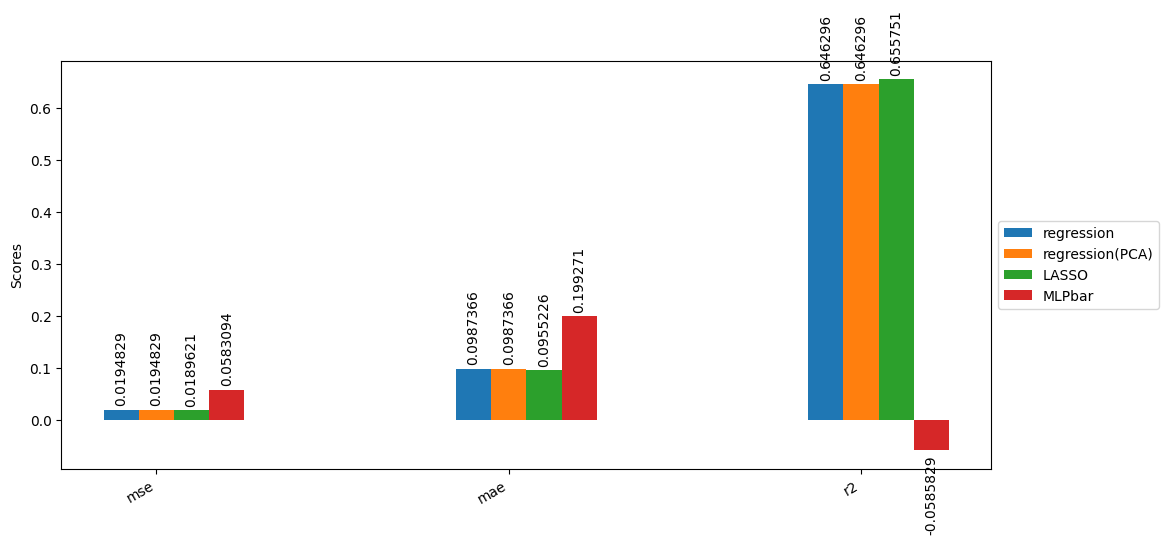

In [29]:
#Create a bar chart of the three regression metrics for each model on the same plot.
labels = ['mse', 'mae', 'r2']
fig, ax = plt.subplots()
fig.autofmt_xdate()
w = 0.1
ax = plt.subplot(111)

#reg model 
x,y = zip(*p2_metrics(Final_Y_CRIME_test_set,Y_pred_test).items())
ind = np.arange(len(x))
#ax.set_xticklabels(x,fontdict ={'fontsize':8})

#reg(PCA) 
Sx,Sy = zip(*p2_metrics(Final_Y_CRIME_test_set,Y_pred_PCA_test).items())

#LASSO
Lx,Ly = zip(*p2_metrics(Final_Y_CRIME_test_set,LASSO_Y_pred_test).items())

#MLP
Mx,My = zip(*p2_metrics(Final_Y_CRIME_test_set,MLP_Y_pred_test).items())

regbar = ax.bar(ind -w, y, width=w, align='center' ,label='regression')
regPCA_bar = ax.bar(ind , Sy, width=w, align='center' ,label='regression(PCA)')
LASSObar = ax.bar(ind +w , Ly, width=w, align='center',label='LASSO')
MLPbar = ax.bar(ind +2*w , My, width=w, align='center' ,label='MLPbar')

ax.set_xticks(ind, labels)
ax.set_ylabel('Scores')

ax.bar_label(regbar, padding=3,rotation = 90)
ax.bar_label(regPCA_bar, padding=3,rotation = 90)
ax.bar_label(LASSObar, padding=3,rotation = 90)
ax.bar_label(MLPbar, padding=3,rotation = 90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()